<a href="https://colab.research.google.com/github/SreevishnuAB/ChimpData/blob/main/DAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl networkx[default]
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 38.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/chimp_data_cleaned.csv", dtype="str")
df_gender_data = pd.read_excel("drive/MyDrive/Colab Notebooks/Issa_Community.xlsx", dtype="str")

In [ ]:
df_gender_data = df_gender_data.loc[:, ["NAME", "DemoGrp_2022"]]
df_gender_data = df_gender_data.rename(columns={"NAME": "name", "DemoGrp_2022": "gender"})
df_gender_data['name'] = df_gender_data['name'].str.lower()
df_gender_data['gender'] = df_gender_data['gender'].str.lower()

df_gender_data


,name,gender
0,alizeti,f
1,baseka,f
2,bingwa,m
3,bonge,m
4,dhahabu,m
5,elisha,m
6,imba,m
7,joto,f
8,jua,f
9,kasolya,f


In [ ]:
gender_dict = df_gender_data.to_dict("records")
gender_mapping = {item["name"]: item["gender"] for item in gender_dict}
gender_mapping

{'alizeti': 'f',
 'baseka': 'f',
 'bingwa': 'm',
 'bonge': 'm',
 'dhahabu': 'm',
 'elisha': 'm',
 'imba': 'm',
 'joto': 'f',
 'jua': 'f',
 'kasolya': 'f',
 'kila': 'f',
 'kinanda': 'f',
 'kitambi': 'm',
 'kitu': 'f',
 'kovujicho': 'f',
 'kukulon': 'm',
 'maliki': 'm',
 'maua': 'f',
 'mbawa': 'f',
 'mbaya': 'm',
 'mosi': 'm',
 'samaki': 'm',
 'sanaa': 'm',
 'konso': 'f',
 'uyoga': 'm',
 'waiti': 'm',
 'wingu': 'm',
 'zai': 'f',
 'alimas': 'm',
 'kinundi': 'm',
 'busu': 'f',
 'maisha': 'm',
 'corona': 'f',
 'rosa': 'f',
 'keki': 'm',
 'kule': 'm',
 'mbali': 'f',
 'amelie': 'f'}

In [ ]:
individuals = set(df['A'].values).union(df['B'].values)
individuals

{'alizeti',
 'almasi',
 'baseka',
 'bingwa',
 'bonge',
 'corona',
 'dhahabu',
 'elisha',
 'imba',
 'joto',
 'jua',
 'kasolya',
 'kinanda',
 'kinundi',
 'kitambi',
 'kovujicho',
 'kukolon',
 'kukulon',
 'maisha',
 'maua',
 'mbawa',
 'mbaya',
 'mosi',
 'rosa',
 'samaki',
 'sanaa',
 'unid1',
 'uyoga',
 'waiti',
 'wingu',
 'zai'}

In [ ]:
for individual in individuals:
  if individual not in list(df_gender_data['name'].values):
    print(individual)

almasi
unid1
kukolon


In [ ]:
df = df.loc[(df['A'] != 'unid1') & (df['B'] != 'unid1'), :]
df = df.loc[(df['A'] != 'kukolon') & (df['B'] != 'kukolon'), :]
df = df.loc[(df['A'] != 'almasi') & (df['B'] != 'almasi'), :]
df

,Month,A,B,party
0,12,baseka,dhahabu,"baseka,dhahabu,corona,mbaya"
1,2,bingwa,dhahabu,"bingwa,dhahabu,imba,kitambi,kovujicho,samaki"
2,5,bonge,dhahabu,"bonge,dhahabu,elisha,imba,kitambi,kovujicho,ku..."
3,6,bonge,dhahabu,"bonge,dhahabu,wingu,rosa,mbaya"
4,8,bonge,dhahabu,"bonge,dhahabu,"
...,...,...,...,...
2627,8,maua,maisha,"maua,maisha,"
2628,8,maua,maisha,"maua,maisha,"
2629,9,maua,maisha,"maua,maisha,"
2630,9,maua,maisha,"maua,maisha,"


In [ ]:
df['Month'] = pd.to_numeric(df['Month'])
df_wet_season = df[(df['Month'] >= 11) | (df['Month'] <= 4)]
df_dry_season = df[(df['Month'] >= 5) & (df['Month'] <= 10)]
df_wet_season

,Month,A,B,party
0,12,baseka,dhahabu,"baseka,dhahabu,corona,mbaya"
1,2,bingwa,dhahabu,"bingwa,dhahabu,imba,kitambi,kovujicho,samaki"
23,12,corona,dhahabu,"corona,dhahabu,elisha"
36,4,imba,dhahabu,"imba,dhahabu,mosi,not_visible"
62,3,kitambi,dhahabu,"kitambi,dhahabu,imba,kasolya"
...,...,...,...,...
2567,4,mbawa,joto,"mbawa,joto,jua,maisha,maua"
2568,4,mbawa,joto,"mbawa,joto,jua,maisha,maua"
2606,4,mbawa,uyoga,"mbawa,uyoga,kasolya,jua,joto,maisha,maua"
2610,3,rosa,uyoga,"rosa,uyoga,kasolya"


In [ ]:
individual_filtered_wet_season = set(df_wet_season['A'].values).union(set(df_wet_season['B'].values))
individual_filtered_wet_season

{'alizeti',
 'baseka',
 'bingwa',
 'bonge',
 'corona',
 'dhahabu',
 'elisha',
 'imba',
 'joto',
 'jua',
 'kasolya',
 'kinanda',
 'kitambi',
 'kovujicho',
 'kukulon',
 'maua',
 'mbawa',
 'mbaya',
 'mosi',
 'rosa',
 'samaki',
 'sanaa',
 'uyoga',
 'waiti',
 'wingu',
 'zai'}

In [ ]:
individual_filtered_dry_season = set(df_dry_season['A'].values).union(set(df_dry_season['B'].values))
individual_filtered_dry_season

{'alizeti',
 'baseka',
 'bingwa',
 'bonge',
 'corona',
 'dhahabu',
 'elisha',
 'imba',
 'joto',
 'jua',
 'kasolya',
 'kinanda',
 'kinundi',
 'kitambi',
 'kovujicho',
 'kukulon',
 'maisha',
 'maua',
 'mbawa',
 'mbaya',
 'mosi',
 'rosa',
 'samaki',
 'sanaa',
 'uyoga',
 'waiti',
 'wingu',
 'zai'}

In [ ]:
n_individual_occurences_wet_season = {i: 0 for i in individual_filtered_wet_season}
n_individual_occurences_wet_season


{'wingu': 0,
 'baseka': 0,
 'mbawa': 0,
 'joto': 0,
 'bingwa': 0,
 'kitambi': 0,
 'jua': 0,
 'corona': 0,
 'elisha': 0,
 'dhahabu': 0,
 'mbaya': 0,
 'mosi': 0,
 'imba': 0,
 'alizeti': 0,
 'kukulon': 0,
 'zai': 0,
 'bonge': 0,
 'rosa': 0,
 'kinanda': 0,
 'kasolya': 0,
 'waiti': 0,
 'samaki': 0,
 'sanaa': 0,
 'uyoga': 0,
 'kovujicho': 0,
 'maua': 0}

In [ ]:
n_individual_occurences_dry_season = {i: 0 for i in individual_filtered_dry_season}
n_individual_occurences_dry_season


{'wingu': 0,
 'baseka': 0,
 'mbawa': 0,
 'maisha': 0,
 'joto': 0,
 'kinundi': 0,
 'bingwa': 0,
 'kitambi': 0,
 'jua': 0,
 'corona': 0,
 'elisha': 0,
 'dhahabu': 0,
 'mbaya': 0,
 'mosi': 0,
 'imba': 0,
 'alizeti': 0,
 'kukulon': 0,
 'zai': 0,
 'bonge': 0,
 'rosa': 0,
 'kinanda': 0,
 'kasolya': 0,
 'waiti': 0,
 'samaki': 0,
 'sanaa': 0,
 'uyoga': 0,
 'kovujicho': 0,
 'maua': 0}

In [ ]:
for individual in individual_filtered_wet_season:
  for party in list(df_wet_season['party'].values):
    if individual in party:
      n_individual_occurences_wet_season[individual] += 1

n_individual_occurences_wet_season

{'wingu': 101,
 'baseka': 30,
 'mbawa': 33,
 'joto': 26,
 'bingwa': 111,
 'kitambi': 161,
 'jua': 30,
 'corona': 136,
 'elisha': 191,
 'dhahabu': 130,
 'mbaya': 93,
 'mosi': 179,
 'imba': 231,
 'alizeti': 4,
 'kukulon': 47,
 'zai': 46,
 'bonge': 47,
 'rosa': 77,
 'kinanda': 8,
 'kasolya': 121,
 'waiti': 139,
 'samaki': 154,
 'sanaa': 108,
 'uyoga': 42,
 'kovujicho': 122,
 'maua': 54}

In [ ]:
for individual in individual_filtered_dry_season:
  for party in list(df_dry_season['party'].values):
    if individual in party:
      n_individual_occurences_dry_season[individual] += 1

n_individual_occurences_dry_season

{'wingu': 694,
 'baseka': 118,
 'mbawa': 221,
 'maisha': 93,
 'joto': 190,
 'kinundi': 115,
 'bingwa': 571,
 'kitambi': 623,
 'jua': 285,
 'corona': 493,
 'elisha': 750,
 'dhahabu': 616,
 'mbaya': 811,
 'mosi': 510,
 'imba': 1239,
 'alizeti': 3,
 'kukulon': 137,
 'zai': 196,
 'bonge': 700,
 'rosa': 225,
 'kinanda': 162,
 'kasolya': 902,
 'waiti': 648,
 'samaki': 691,
 'sanaa': 784,
 'uyoga': 188,
 'kovujicho': 455,
 'maua': 153}

In [ ]:
df_wet_season['gender_A'] = ''
df_wet_season['gender_B'] = ''

for individual in individual_filtered_wet_season:
  df_wet_season.loc[df_wet_season['A'] == individual, 'gender_A'] = gender_mapping[individual]
  df_wet_season.loc[df_wet_season['B'] == individual, 'gender_B'] = gender_mapping[individual]

df_wet_season

<ipython-input-17-d09a8cbba402>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wet_season['gender_A'] = ''
<ipython-input-17-d09a8cbba402>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wet_season['gender_B'] = ''
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Month,A,B,party,gender_A,gender_B
0,12,baseka,dhahabu,"baseka,dhahabu,corona,mbaya",f,m
1,2,bingwa,dhahabu,"bingwa,dhahabu,imba,kitambi,kovujicho,samaki",m,m
23,12,corona,dhahabu,"corona,dhahabu,elisha",f,m
36,4,imba,dhahabu,"imba,dhahabu,mosi,not_visible",m,m
62,3,kitambi,dhahabu,"kitambi,dhahabu,imba,kasolya",m,m
...,...,...,...,...,...,...
2567,4,mbawa,joto,"mbawa,joto,jua,maisha,maua",f,f
2568,4,mbawa,joto,"mbawa,joto,jua,maisha,maua",f,f
2606,4,mbawa,uyoga,"mbawa,uyoga,kasolya,jua,joto,maisha,maua",f,m
2610,3,rosa,uyoga,"rosa,uyoga,kasolya",f,m


In [ ]:
df_dry_season['gender_A'] = ''
df_dry_season['gender_B'] = ''

for individual in individual_filtered_dry_season:
  df_dry_season.loc[df_dry_season['A'] == individual, 'gender_A'] = gender_mapping[individual]
  df_dry_season.loc[df_dry_season['B'] == individual, 'gender_B'] = gender_mapping[individual]

df_dry_season

<ipython-input-18-f309513b510e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dry_season['gender_A'] = ''
<ipython-input-18-f309513b510e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dry_season['gender_B'] = ''
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Month,A,B,party,gender_A,gender_B
2,5,bonge,dhahabu,"bonge,dhahabu,elisha,imba,kitambi,kovujicho,ku...",m,m
3,6,bonge,dhahabu,"bonge,dhahabu,wingu,rosa,mbaya",m,m
4,8,bonge,dhahabu,"bonge,dhahabu,",m,m
5,8,bonge,dhahabu,"bonge,dhahabu,",m,m
6,8,bonge,dhahabu,"bonge,dhahabu,unknown,baseka",m,m
...,...,...,...,...,...,...
2627,8,maua,maisha,"maua,maisha,",f,m
2628,8,maua,maisha,"maua,maisha,",f,m
2629,9,maua,maisha,"maua,maisha,",f,m
2630,9,maua,maisha,"maua,maisha,",f,m


In [ ]:
# df_wet_season[(df_wet_season['gender_A'] == "f") & (df_wet_season['gender_B'] == "f")]  # sanity check
df_wet_season[(df_wet_season['gender_A'] == "m") & (df_wet_season['gender_B'] == "m")]  # sanity check

,Month,A,B,party,gender_A,gender_B
1,2,bingwa,dhahabu,"bingwa,dhahabu,imba,kitambi,kovujicho,samaki",m,m
36,4,imba,dhahabu,"imba,dhahabu,mosi,not_visible",m,m
62,3,kitambi,dhahabu,"kitambi,dhahabu,imba,kasolya",m,m
63,3,kitambi,dhahabu,"kitambi,dhahabu,imba,kasolya,imba,kovujicho,bi...",m,m
64,3,kitambi,dhahabu,"kitambi,dhahabu,imba,kovujicho,bingwa,imba,kas...",m,m
...,...,...,...,...,...,...
2522,11,kukulon,bingwa,"kukulon,bingwa,baseka,imba,kitambi,maua,maisha...",m,m
2523,12,kukulon,bingwa,"kukulon,bingwa,samaki",m,m
2545,2,samaki,bingwa,"samaki,bingwa,maisha,maua,kovujicho",m,m
2546,2,samaki,bingwa,"samaki,bingwa,maisha,maua,kovujicho,maua,maisha",m,m


In [ ]:
# df_dry_season[(df_dry_season['gender_A'] == "f") & (df_dry_season['gender_B'] == "f")]  # sanity check
df_dry_season[(df_dry_season['gender_A'] == "m") & (df_dry_season['gender_B'] == "m")]  # sanity check

,Month,A,B,party,gender_A,gender_B
2,5,bonge,dhahabu,"bonge,dhahabu,elisha,imba,kitambi,kovujicho,ku...",m,m
3,6,bonge,dhahabu,"bonge,dhahabu,wingu,rosa,mbaya",m,m
4,8,bonge,dhahabu,"bonge,dhahabu,",m,m
5,8,bonge,dhahabu,"bonge,dhahabu,",m,m
6,8,bonge,dhahabu,"bonge,dhahabu,unknown,baseka",m,m
...,...,...,...,...,...,...
2617,6,sanaa,uyoga,"sanaa,uyoga,zai",m,m
2618,10,sanaa,uyoga,"sanaa,uyoga,",m,m
2620,8,waiti,uyoga,"waiti,uyoga,dhahabu,imba,kasolya,kukolon,mbaya...",m,m
2621,8,waiti,uyoga,"waiti,uyoga,dhahabu,imba,kasolya,kukolon,mbaya...",m,m


In [ ]:
gpby_wet_season = df_wet_season.groupby(['A', 'B'])
unique_pairs_wet_season = list(gpby_wet_season.groups.keys())
n_unique_pair_occurrences_wet_season = {}
for pair in unique_pairs_wet_season:
  if pair[0] not in n_unique_pair_occurrences_wet_season.keys():
    n_unique_pair_occurrences_wet_season[pair[0]] = {}
  n_unique_pair_occurrences_wet_season[pair[0]][pair[1]] = 0
n_unique_pair_occurrences_wet_season

{'baseka': {'dhahabu': 0, 'samaki': 0, 'sanaa': 0},
 'bingwa': {'alizeti': 0,
  'corona': 0,
  'dhahabu': 0,
  'kinanda': 0,
  'kovujicho': 0,
  'mosi': 0,
  'samaki': 0},
 'bonge': {'waiti': 0},
 'corona': {'baseka': 0,
  'bingwa': 0,
  'dhahabu': 0,
  'elisha': 0,
  'imba': 0,
  'jua': 0,
  'kasolya': 0,
  'mosi': 0,
  'samaki': 0,
  'wingu': 0},
 'dhahabu': {'baseka': 0,
  'bingwa': 0,
  'bonge': 0,
  'corona': 0,
  'elisha': 0,
  'imba': 0,
  'jua': 0,
  'kasolya': 0,
  'kovujicho': 0,
  'mosi': 0,
  'rosa': 0,
  'sanaa': 0,
  'waiti': 0,
  'wingu': 0},
 'elisha': {'bingwa': 0,
  'corona': 0,
  'imba': 0,
  'kitambi': 0,
  'kovujicho': 0,
  'mbaya': 0,
  'mosi': 0,
  'samaki': 0,
  'sanaa': 0,
  'wingu': 0,
  'zai': 0},
 'imba': {'bonge': 0,
  'dhahabu': 0,
  'elisha': 0,
  'kitambi': 0,
  'mbaya': 0,
  'mosi': 0,
  'wingu': 0},
 'kasolya': {'bingwa': 0,
  'elisha': 0,
  'imba': 0,
  'kitambi': 0,
  'kovujicho': 0,
  'samaki': 0,
  'wingu': 0},
 'kitambi': {'bingwa': 0,
  'corona':

In [ ]:
gpby_dry_season = df_dry_season.groupby(['A', 'B'])
unique_pairs_dry_season = list(gpby_dry_season.groups.keys())
n_unique_pair_occurrences_dry_season = {}
for pair in unique_pairs_dry_season:
  if pair[0] not in n_unique_pair_occurrences_dry_season.keys():
    n_unique_pair_occurrences_dry_season[pair[0]] = {}
  n_unique_pair_occurrences_dry_season[pair[0]][pair[1]] = 0
n_unique_pair_occurrences_dry_season

{'alizeti': {'jua': 0, 'mosi': 0},
 'baseka': {'bonge': 0,
  'elisha': 0,
  'imba': 0,
  'joto': 0,
  'jua': 0,
  'kasolya': 0,
  'kinanda': 0,
  'maisha': 0,
  'maua': 0,
  'mbaya': 0,
  'samaki': 0,
  'uyoga': 0,
  'wingu': 0,
  'zai': 0},
 'bingwa': {'corona': 0,
  'elisha': 0,
  'kitambi': 0,
  'kovujicho': 0,
  'waiti': 0},
 'bonge': {'baseka': 0,
  'bingwa': 0,
  'corona': 0,
  'dhahabu': 0,
  'elisha': 0,
  'imba': 0,
  'jua': 0,
  'kasolya': 0,
  'kitambi': 0,
  'kovujicho': 0,
  'maua': 0,
  'mbawa': 0,
  'mbaya': 0,
  'mosi': 0,
  'rosa': 0,
  'samaki': 0,
  'sanaa': 0,
  'uyoga': 0,
  'waiti': 0,
  'wingu': 0,
  'zai': 0},
 'corona': {'bingwa': 0,
  'bonge': 0,
  'dhahabu': 0,
  'elisha': 0,
  'imba': 0,
  'kasolya': 0,
  'kitambi': 0,
  'kovujicho': 0,
  'mbaya': 0,
  'mosi': 0,
  'samaki': 0,
  'sanaa': 0,
  'uyoga': 0,
  'waiti': 0},
 'dhahabu': {'bingwa': 0,
  'bonge': 0,
  'corona': 0,
  'elisha': 0,
  'imba': 0,
  'kasolya': 0,
  'kitambi': 0,
  'kovujicho': 0,
  'mbay

In [ ]:
for pair in unique_pairs_wet_season:
  for party in list(df_wet_season['party'].values):
    if pair[0] in party and pair[1] in party:
      n_unique_pair_occurrences_wet_season[pair[0]][pair[1]] += 1
n_unique_pair_occurrences_wet_season

{'baseka': {'dhahabu': 6, 'samaki': 3, 'sanaa': 4},
 'bingwa': {'alizeti': 4,
  'corona': 31,
  'dhahabu': 48,
  'kinanda': 4,
  'kovujicho': 95,
  'mosi': 32,
  'samaki': 48},
 'bonge': {'waiti': 32},
 'corona': {'baseka': 18,
  'bingwa': 31,
  'dhahabu': 40,
  'elisha': 93,
  'imba': 94,
  'jua': 8,
  'kasolya': 47,
  'mosi': 70,
  'samaki': 40,
  'wingu': 39},
 'dhahabu': {'baseka': 6,
  'bingwa': 48,
  'bonge': 40,
  'corona': 40,
  'elisha': 59,
  'imba': 88,
  'jua': 3,
  'kasolya': 51,
  'kovujicho': 51,
  'mosi': 61,
  'rosa': 30,
  'sanaa': 47,
  'waiti': 63,
  'wingu': 48},
 'elisha': {'bingwa': 45,
  'corona': 93,
  'imba': 137,
  'kitambi': 107,
  'kovujicho': 43,
  'mbaya': 49,
  'mosi': 107,
  'samaki': 68,
  'sanaa': 66,
  'wingu': 67,
  'zai': 30},
 'imba': {'bonge': 42,
  'dhahabu': 88,
  'elisha': 137,
  'kitambi': 131,
  'mbaya': 63,
  'mosi': 135,
  'wingu': 71},
 'kasolya': {'bingwa': 33,
  'elisha': 63,
  'imba': 87,
  'kitambi': 65,
  'kovujicho': 45,
  'samaki':

In [ ]:
for pair in unique_pairs_dry_season:
  for party in list(df_dry_season['party'].values):
    if pair[0] in party and pair[1] in party:
      n_unique_pair_occurrences_dry_season[pair[0]][pair[1]] += 1
n_unique_pair_occurrences_dry_season

{'alizeti': {'jua': 2, 'mosi': 2},
 'baseka': {'bonge': 45,
  'elisha': 65,
  'imba': 70,
  'joto': 32,
  'jua': 33,
  'kasolya': 56,
  'kinanda': 6,
  'maisha': 13,
  'maua': 14,
  'mbaya': 48,
  'samaki': 37,
  'uyoga': 17,
  'wingu': 37,
  'zai': 12},
 'bingwa': {'corona': 208,
  'elisha': 288,
  'kitambi': 245,
  'kovujicho': 326,
  'waiti': 184},
 'bonge': {'baseka': 45,
  'bingwa': 295,
  'corona': 217,
  'dhahabu': 260,
  'elisha': 289,
  'imba': 467,
  'jua': 48,
  'kasolya': 271,
  'kitambi': 197,
  'kovujicho': 173,
  'maua': 33,
  'mbawa': 37,
  'mbaya': 389,
  'mosi': 181,
  'rosa': 89,
  'samaki': 397,
  'sanaa': 336,
  'uyoga': 20,
  'waiti': 234,
  'wingu': 358,
  'zai': 20},
 'corona': {'bingwa': 208,
  'bonge': 217,
  'dhahabu': 139,
  'elisha': 244,
  'imba': 337,
  'kasolya': 235,
  'kitambi': 245,
  'kovujicho': 130,
  'mbaya': 199,
  'mosi': 190,
  'samaki': 222,
  'sanaa': 251,
  'uyoga': 58,
  'waiti': 147},
 'dhahabu': {'bingwa': 176,
  'bonge': 260,
  'corona':

In [ ]:
df_wet_season_ff = df_wet_season[(df_wet_season['gender_A'] == 'f') & (df_wet_season['gender_B'] == 'f')]
df_wet_season_ff

,Month,A,B,party,gender_A,gender_B
166,4,mbawa,maua,"mbawa,maua,joto,jua,maisha",f,f
167,4,mbawa,maua,"mbawa,maua,joto,jua,maisha",f,f
168,4,mbawa,maua,"mbawa,maua,joto,jua,maisha",f,f
169,4,mbawa,maua,"mbawa,maua,joto,jua,maisha",f,f
170,4,mbawa,maua,"mbawa,maua,joto,jua,maisha",f,f
171,4,mbawa,maua,"mbawa,maua,joto,jua,maisha",f,f
176,11,mbawa,maua,"mbawa,maua,kasolya,kitambi,mbaya",f,f
190,3,corona,baseka,"corona,baseka,elisha,imba,kasolya,kitambi",f,f
197,12,mbawa,baseka,"mbawa,baseka,dhahabu,imba",f,f
719,3,corona,jua,"corona,jua,elisha,imba,kasolya,elisha,imba",f,f


In [ ]:
df_wet_season_mm = df_wet_season[(df_wet_season['gender_A'] == 'm') & (df_wet_season['gender_B'] == 'm')]
df_wet_season_mm

,Month,A,B,party,gender_A,gender_B
1,2,bingwa,dhahabu,"bingwa,dhahabu,imba,kitambi,kovujicho,samaki",m,m
36,4,imba,dhahabu,"imba,dhahabu,mosi,not_visible",m,m
62,3,kitambi,dhahabu,"kitambi,dhahabu,imba,kasolya",m,m
63,3,kitambi,dhahabu,"kitambi,dhahabu,imba,kasolya,imba,kovujicho,bi...",m,m
64,3,kitambi,dhahabu,"kitambi,dhahabu,imba,kovujicho,bingwa,imba,kas...",m,m
...,...,...,...,...,...,...
2522,11,kukulon,bingwa,"kukulon,bingwa,baseka,imba,kitambi,maua,maisha...",m,m
2523,12,kukulon,bingwa,"kukulon,bingwa,samaki",m,m
2545,2,samaki,bingwa,"samaki,bingwa,maisha,maua,kovujicho",m,m
2546,2,samaki,bingwa,"samaki,bingwa,maisha,maua,kovujicho,maua,maisha",m,m


In [ ]:
df_dry_season_ff = df_dry_season[(df_dry_season['gender_A'] == 'f') & (df_dry_season['gender_B'] == 'f')]
df_dry_season_ff

,Month,A,B,party,gender_A,gender_B
145,6,baseka,maua,"baseka,maua,corona,imba,kitambi,zai,uyoga",f,f
146,10,baseka,maua,"baseka,maua,maisha",f,f
147,10,baseka,maua,"baseka,maua,maisha",f,f
148,10,baseka,maua,"baseka,maua,maisha",f,f
149,10,baseka,maua,"baseka,maua,maisha",f,f
...,...,...,...,...,...,...
2573,7,mbawa,joto,"mbawa,joto,bingwa,jua,kasolya,kinanda,kinundi,...",f,f
2574,7,mbawa,joto,"mbawa,joto,imba,jua,kasolya",f,f
2575,7,mbawa,joto,"mbawa,joto,imba,jua",f,f
2576,7,mbawa,joto,"mbawa,joto,jua,maisha,maua",f,f


In [ ]:
df_dry_season_mm = df_dry_season[(df_dry_season['gender_A'] == 'm') & (df_dry_season['gender_B'] == 'm')]
df_dry_season_mm

,Month,A,B,party,gender_A,gender_B
2,5,bonge,dhahabu,"bonge,dhahabu,elisha,imba,kitambi,kovujicho,ku...",m,m
3,6,bonge,dhahabu,"bonge,dhahabu,wingu,rosa,mbaya",m,m
4,8,bonge,dhahabu,"bonge,dhahabu,",m,m
5,8,bonge,dhahabu,"bonge,dhahabu,",m,m
6,8,bonge,dhahabu,"bonge,dhahabu,unknown,baseka",m,m
...,...,...,...,...,...,...
2617,6,sanaa,uyoga,"sanaa,uyoga,zai",m,m
2618,10,sanaa,uyoga,"sanaa,uyoga,",m,m
2620,8,waiti,uyoga,"waiti,uyoga,dhahabu,imba,kasolya,kukolon,mbaya...",m,m
2621,8,waiti,uyoga,"waiti,uyoga,dhahabu,imba,kasolya,kukolon,mbaya...",m,m


In [ ]:
dai_wet_season_ff = []

gpby_wet_season_ff = df_wet_season_ff.groupby(['A', 'B'])
for pair in list(gpby_wet_season_ff.groups.keys()):
  pab = n_unique_pair_occurrences_wet_season[pair[0]][pair[1]]
  pa = n_individual_occurences_wet_season[pair[0]]
  pb = n_individual_occurences_wet_season[pair[1]]
  dai = pab / (pa + pb - pab)
  dai_wet_season_ff.append({"A": pair[0], "B": pair[1], "DAI": dai})


dai_wet_season_ff

[{'A': 'corona', 'B': 'baseka', 'DAI': 0.12162162162162163},
 {'A': 'corona', 'B': 'jua', 'DAI': 0.05063291139240506},
 {'A': 'corona', 'B': 'kasolya', 'DAI': 0.22380952380952382},
 {'A': 'kasolya', 'B': 'kovujicho', 'DAI': 0.22727272727272727},
 {'A': 'mbawa', 'B': 'baseka', 'DAI': 0.016129032258064516},
 {'A': 'mbawa', 'B': 'joto', 'DAI': 0.7878787878787878},
 {'A': 'mbawa', 'B': 'jua', 'DAI': 0.6578947368421053},
 {'A': 'mbawa', 'B': 'kovujicho', 'DAI': 0.026490066225165563},
 {'A': 'mbawa', 'B': 'maua', 'DAI': 0.4262295081967213},
 {'A': 'mbawa', 'B': 'zai', 'DAI': 0.039473684210526314},
 {'A': 'rosa', 'B': 'kasolya', 'DAI': 0.08791208791208792},
 {'A': 'rosa', 'B': 'kovujicho', 'DAI': 0.09944751381215469},
 {'A': 'rosa', 'B': 'zai', 'DAI': 0.11818181818181818}]

In [ ]:
dai_wet_season_mm = []

gpby_wet_season_mm = df_wet_season_mm.groupby(['A', 'B'])
for pair in list(gpby_wet_season_mm.groups.keys()):
  pab = n_unique_pair_occurrences_wet_season[pair[0]][pair[1]]
  pa = n_individual_occurences_wet_season[pair[0]]
  pb = n_individual_occurences_wet_season[pair[1]]
  dai = pab / (pa + pb - pab)
  dai_wet_season_mm.append({"A": pair[0], "B": pair[1], "DAI": dai})


dai_wet_season_mm

[{'A': 'bingwa', 'B': 'dhahabu', 'DAI': 0.24870466321243523},
 {'A': 'bingwa', 'B': 'mosi', 'DAI': 0.12403100775193798},
 {'A': 'bingwa', 'B': 'samaki', 'DAI': 0.22119815668202766},
 {'A': 'bonge', 'B': 'waiti', 'DAI': 0.2077922077922078},
 {'A': 'dhahabu', 'B': 'bingwa', 'DAI': 0.24870466321243523},
 {'A': 'dhahabu', 'B': 'bonge', 'DAI': 0.291970802919708},
 {'A': 'dhahabu', 'B': 'elisha', 'DAI': 0.22519083969465647},
 {'A': 'dhahabu', 'B': 'imba', 'DAI': 0.32234432234432236},
 {'A': 'dhahabu', 'B': 'mosi', 'DAI': 0.24596774193548387},
 {'A': 'dhahabu', 'B': 'sanaa', 'DAI': 0.24607329842931938},
 {'A': 'dhahabu', 'B': 'waiti', 'DAI': 0.3058252427184466},
 {'A': 'dhahabu', 'B': 'wingu', 'DAI': 0.26229508196721313},
 {'A': 'elisha', 'B': 'bingwa', 'DAI': 0.17509727626459143},
 {'A': 'elisha', 'B': 'imba', 'DAI': 0.4807017543859649},
 {'A': 'elisha', 'B': 'kitambi', 'DAI': 0.43673469387755104},
 {'A': 'elisha', 'B': 'mbaya', 'DAI': 0.20851063829787234},
 {'A': 'elisha', 'B': 'mosi', 'DAI

In [ ]:
dai_dry_season_ff = []

gpby_dry_season_ff = df_dry_season_ff.groupby(['A', 'B'])
for pair in list(gpby_dry_season_ff.groups.keys()):
  pab = n_unique_pair_occurrences_dry_season[pair[0]][pair[1]]
  pa = n_individual_occurences_dry_season[pair[0]]
  pb = n_individual_occurences_dry_season[pair[1]]
  dai = pab / (pa + pb - pab)
  dai_dry_season_ff.append({"A": pair[0], "B": pair[1], "DAI": dai})


dai_dry_season_ff

[{'A': 'alizeti', 'B': 'jua', 'DAI': 0.006993006993006993},
 {'A': 'baseka', 'B': 'joto', 'DAI': 0.11594202898550725},
 {'A': 'baseka', 'B': 'jua', 'DAI': 0.0891891891891892},
 {'A': 'baseka', 'B': 'kasolya', 'DAI': 0.058091286307053944},
 {'A': 'baseka', 'B': 'kinanda', 'DAI': 0.021897810218978103},
 {'A': 'baseka', 'B': 'maua', 'DAI': 0.054474708171206226},
 {'A': 'baseka', 'B': 'zai', 'DAI': 0.039735099337748346},
 {'A': 'corona', 'B': 'kasolya', 'DAI': 0.2025862068965517},
 {'A': 'corona', 'B': 'kovujicho', 'DAI': 0.15892420537897312},
 {'A': 'jua', 'B': 'corona', 'DAI': 0.07607192254495158},
 {'A': 'jua', 'B': 'joto', 'DAI': 0.6379310344827587},
 {'A': 'jua', 'B': 'kasolya', 'DAI': 0.1468599033816425},
 {'A': 'jua', 'B': 'kinanda', 'DAI': 0.21798365122615804},
 {'A': 'jua', 'B': 'kovujicho', 'DAI': 0.06321839080459771},
 {'A': 'jua', 'B': 'maua', 'DAI': 0.1837837837837838},
 {'A': 'jua', 'B': 'mbawa', 'DAI': 0.56656346749226},
 {'A': 'jua', 'B': 'zai', 'DAI': 0.11085450346420324},

In [ ]:
dai_dry_season_mm = []

gpby_dry_season_mm = df_dry_season_mm.groupby(['A', 'B'])
for pair in list(gpby_dry_season_mm.groups.keys()):
  pab = n_unique_pair_occurrences_dry_season[pair[0]][pair[1]]
  pa = n_individual_occurences_dry_season[pair[0]]
  pb = n_individual_occurences_dry_season[pair[1]]
  dai = pab / (pa + pb - pab)
  dai_dry_season_mm.append({"A": pair[0], "B": pair[1], "DAI": dai})


dai_dry_season_mm

[{'A': 'bingwa', 'B': 'elisha', 'DAI': 0.2787996127783156},
 {'A': 'bingwa', 'B': 'kitambi', 'DAI': 0.2581664910432034},
 {'A': 'bingwa', 'B': 'waiti', 'DAI': 0.17777777777777778},
 {'A': 'bonge', 'B': 'bingwa', 'DAI': 0.30225409836065575},
 {'A': 'bonge', 'B': 'dhahabu', 'DAI': 0.24621212121212122},
 {'A': 'bonge', 'B': 'elisha', 'DAI': 0.24892334194659776},
 {'A': 'bonge', 'B': 'imba', 'DAI': 0.3172554347826087},
 {'A': 'bonge', 'B': 'kitambi', 'DAI': 0.17495559502664298},
 {'A': 'bonge', 'B': 'mbaya', 'DAI': 0.34670231729055256},
 {'A': 'bonge', 'B': 'mosi', 'DAI': 0.17589893100097181},
 {'A': 'bonge', 'B': 'samaki', 'DAI': 0.3993963782696177},
 {'A': 'bonge', 'B': 'sanaa', 'DAI': 0.2926829268292683},
 {'A': 'bonge', 'B': 'uyoga', 'DAI': 0.02304147465437788},
 {'A': 'bonge', 'B': 'waiti', 'DAI': 0.21005385996409337},
 {'A': 'bonge', 'B': 'wingu', 'DAI': 0.34555984555984554},
 {'A': 'dhahabu', 'B': 'bingwa', 'DAI': 0.17408506429277942},
 {'A': 'dhahabu', 'B': 'bonge', 'DAI': 0.246212

In [ ]:
df_dai_dry_season_mm = pd.DataFrame(dai_dry_season_mm)
df_dai_dry_season_mm.to_csv("drive/MyDrive/Colab Notebooks/dai_dry_season_mm.csv", header=True, index=False)
df_dai_dry_season_mm

,A,B,DAI
0,bingwa,elisha,0.278800
1,bingwa,kitambi,0.258166
2,bingwa,waiti,0.177778
3,bonge,bingwa,0.302254
4,bonge,dhahabu,0.246212
...,...,...,...
139,wingu,mbaya,0.355856
140,wingu,mosi,0.223577
141,wingu,samaki,0.378109
142,wingu,sanaa,0.312611


In [ ]:
df_dai_dry_season_ff = pd.DataFrame(dai_dry_season_ff)
df_dai_dry_season_ff.to_csv("drive/MyDrive/Colab Notebooks/dai_dry_season_ff.csv", header=True, index=False)
df_dai_dry_season_ff

,A,B,DAI
0,alizeti,jua,0.006993
1,baseka,joto,0.115942
2,baseka,jua,0.089189
3,baseka,kasolya,0.058091
4,baseka,kinanda,0.021898
5,baseka,maua,0.054475
6,baseka,zai,0.039735
7,corona,kasolya,0.202586
8,corona,kovujicho,0.158924
9,jua,corona,0.076072


In [ ]:
df_dai_wet_season_ff = pd.DataFrame(dai_wet_season_ff)
df_dai_wet_season_ff.to_csv("drive/MyDrive/Colab Notebooks/dai_wet_season_ff.csv", header=True, index=False)
df_dai_wet_season_ff

,A,B,DAI
0,corona,baseka,0.121622
1,corona,jua,0.050633
2,corona,kasolya,0.223810
3,kasolya,kovujicho,0.227273
4,mbawa,baseka,0.016129
5,mbawa,joto,0.787879
6,mbawa,jua,0.657895
7,mbawa,kovujicho,0.026490
8,mbawa,maua,0.426230
9,mbawa,zai,0.039474


In [ ]:
df_dai_wet_season_mm = pd.DataFrame(dai_wet_season_mm)
df_dai_wet_season_mm.to_csv("drive/MyDrive/Colab Notebooks/dai_wet_season_mm.csv", header=True, index=False)
df_dai_wet_season_mm

,A,B,DAI
0,bingwa,dhahabu,0.248705
1,bingwa,mosi,0.124031
2,bingwa,samaki,0.221198
3,bonge,waiti,0.207792
4,dhahabu,bingwa,0.248705
...,...,...,...
75,wingu,kitambi,0.278049
76,wingu,mosi,0.308411
77,wingu,samaki,0.197183
78,wingu,sanaa,0.366013


In [ ]:
import numpy as np


def generate_edge_colors(edges):
  color_list = []
  edges.sort()
  for edge in edges:
    color_list.append((0, 0.7, 0.7))
  return color_list

In [ ]:
[(row["A"], row["B"], {"weight": row["DAI"]}) for row in dai_wet_season_ff]

[('corona', 'baseka', {'weight': 0.12162162162162163}),
 ('corona', 'jua', {'weight': 0.05063291139240506}),
 ('corona', 'kasolya', {'weight': 0.22380952380952382}),
 ('kasolya', 'kovujicho', {'weight': 0.22727272727272727}),
 ('mbawa', 'baseka', {'weight': 0.016129032258064516}),
 ('mbawa', 'joto', {'weight': 0.7878787878787878}),
 ('mbawa', 'jua', {'weight': 0.6578947368421053}),
 ('mbawa', 'kovujicho', {'weight': 0.026490066225165563}),
 ('mbawa', 'maua', {'weight': 0.4262295081967213}),
 ('mbawa', 'zai', {'weight': 0.039473684210526314}),
 ('rosa', 'kasolya', {'weight': 0.08791208791208792}),
 ('rosa', 'kovujicho', {'weight': 0.09944751381215469}),
 ('rosa', 'zai', {'weight': 0.11818181818181818})]

{'corona': Text(0.28534118991711976, 0.7057792697990937, 'corona'),
 'baseka': Text(0.8608624090336079, 0.7320778698539198, 'baseka'),
 'jua': Text(0.3924235331253829, -0.25535349508370486, 'jua'),
 'kasolya': Text(-0.27079864440026774, 0.7513823811904128, 'kasolya'),
 'kovujicho': Text(-0.493438078991148, 0.44995779958778037, 'kovujicho'),
 'mbawa': Text(0.27170996647166007, -0.5771303677483746, 'mbawa'),
 'joto': Text(0.5283854186178444, -0.7806434032599081, 'joto'),
 'maua': Text(0.17478506310400063, -1.0, 'maua'),
 'zai': Text(-0.8480866499954136, -0.3239623487269777, 'zai'),
 'rosa': Text(-0.901184206882787, 0.29789229438775866, 'rosa')}

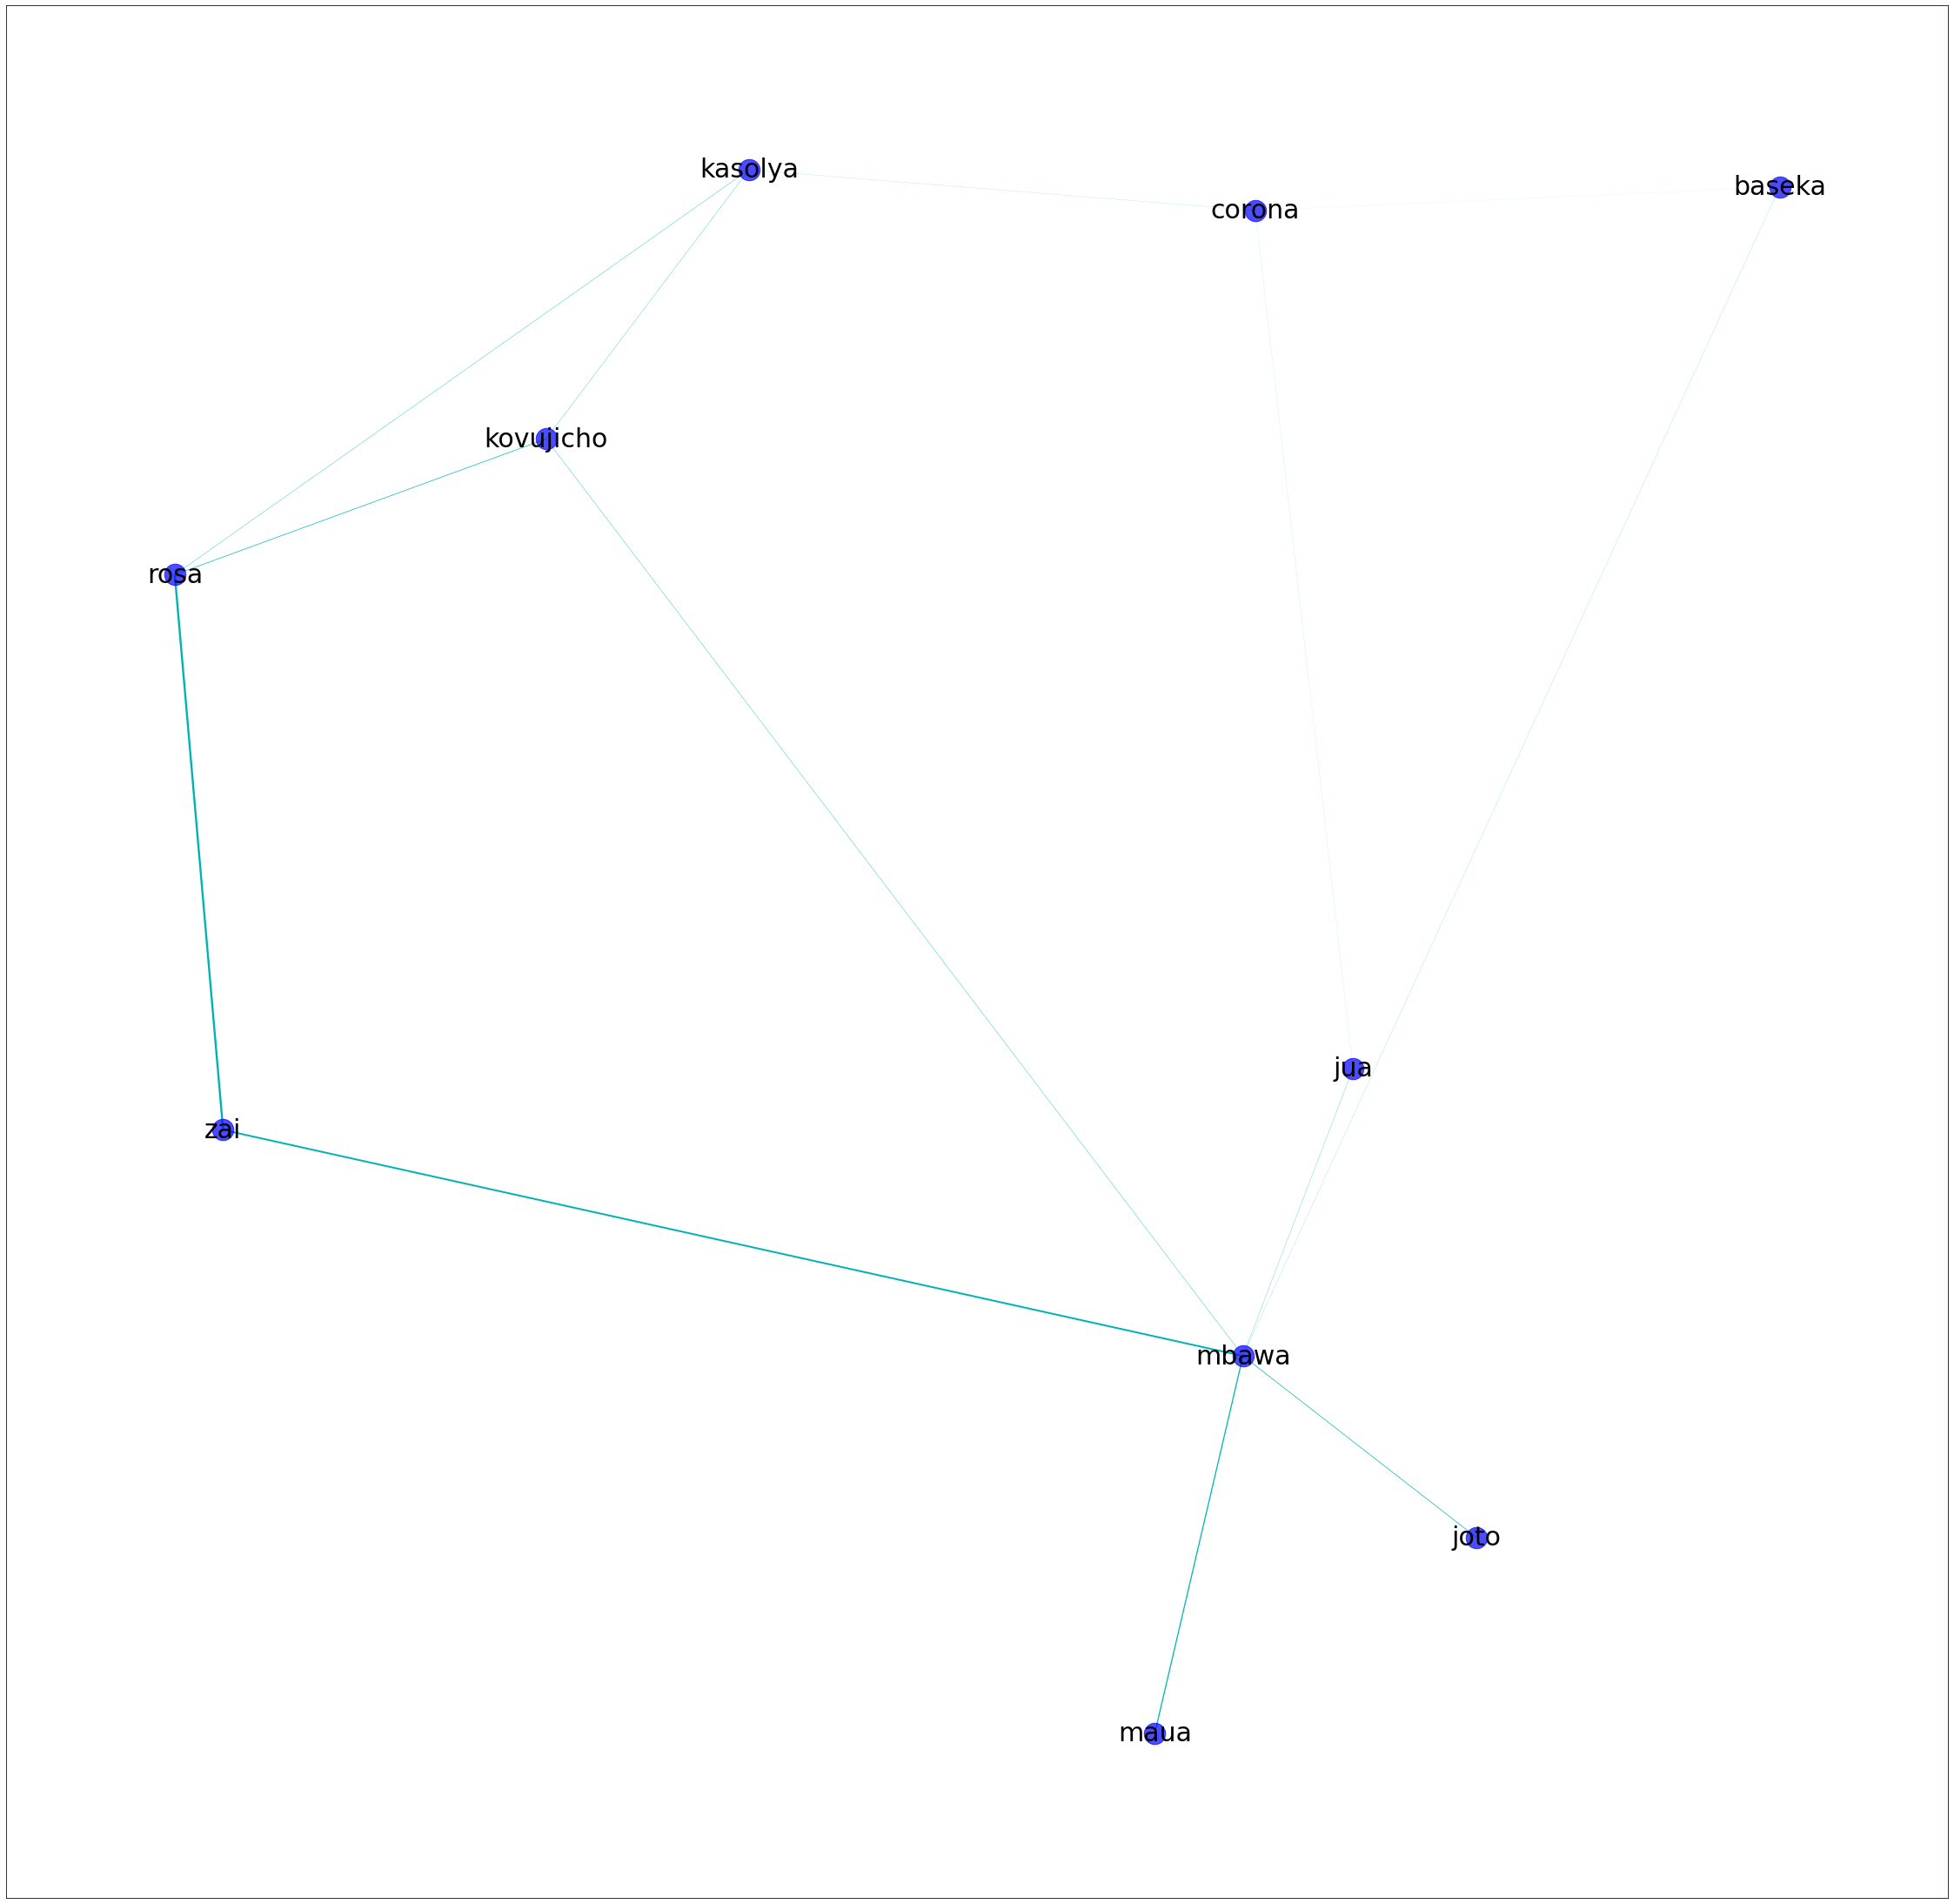

In [ ]:
import matplotlib.pyplot as plt

edge_data_wet_season_ff = [(row["A"], row["B"], {"weight": row["DAI"]}) for row in dai_wet_season_ff]

G_wet_season_ff = nx.Graph()
G_wet_season_ff.add_edges_from(edge_data_wet_season_ff)
pos_wet_season_ff = nx.spring_layout(G_wet_season_ff)

fig, ax = plt.subplots(figsize=(40, 40))

widths_wet_season_ff = nx.get_edge_attributes(G_wet_season_ff, 'weight')
weights_wet_season_ff = list(widths_wet_season_ff.values())

edge_colors_wet_season_ff = generate_edge_colors(weights_wet_season_ff)

weight_adjusted_wet_season_ff = list(map(lambda x: x * 3, weights_wet_season_ff))

nx.draw_networkx_nodes(G_wet_season_ff, pos_wet_season_ff, ax=ax,
                       nodelist=G_wet_season_ff.nodes(),
                       node_color='blue',
                       node_size=600,
                       alpha=0.7)

nx.draw_networkx_edges(G_wet_season_ff, pos_wet_season_ff,
                       edgelist = widths_wet_season_ff.keys(),
                       width=weight_adjusted_wet_season_ff,
                       edge_color=edge_colors_wet_season_ff,
                       alpha=1)
nx.draw_networkx_labels(G_wet_season_ff, pos=pos_wet_season_ff,
                        labels=dict(zip(G_wet_season_ff.nodes(),G_wet_season_ff.nodes())),
                        font_size=30,
                        font_color='black')

{'bingwa': Text(-0.5543594059429231, 0.1300425045000428, 'bingwa'),
 'dhahabu': Text(-0.13402585228196653, -0.19733522371793305, 'dhahabu'),
 'mosi': Text(-0.0431942110914678, 0.0884456096953957, 'mosi'),
 'samaki': Text(-0.14001418290484643, 0.24227953216489448, 'samaki'),
 'bonge': Text(0.24533038763439238, -0.4405833249200034, 'bonge'),
 'waiti': Text(0.25775985261209305, 0.04068764391115568, 'waiti'),
 'elisha': Text(-0.18524766663457304, -0.00573629317242893, 'elisha'),
 'imba': Text(-0.034941975819275474, -0.06879160023307743, 'imba'),
 'sanaa': Text(0.1555850572515433, -0.23971810865629226, 'sanaa'),
 'wingu': Text(0.12738571286724817, -0.0364363524269756, 'wingu'),
 'kitambi': Text(-0.2792471608198124, 0.15078016713695278, 'kitambi'),
 'mbaya': Text(0.06909974107093379, 0.32126570865920373, 'mbaya'),
 'kukulon': Text(-0.48413029594134593, -0.18514806780045223, 'kukulon'),
 'uyoga': Text(1.0, 0.20024780485951774, 'uyoga')}

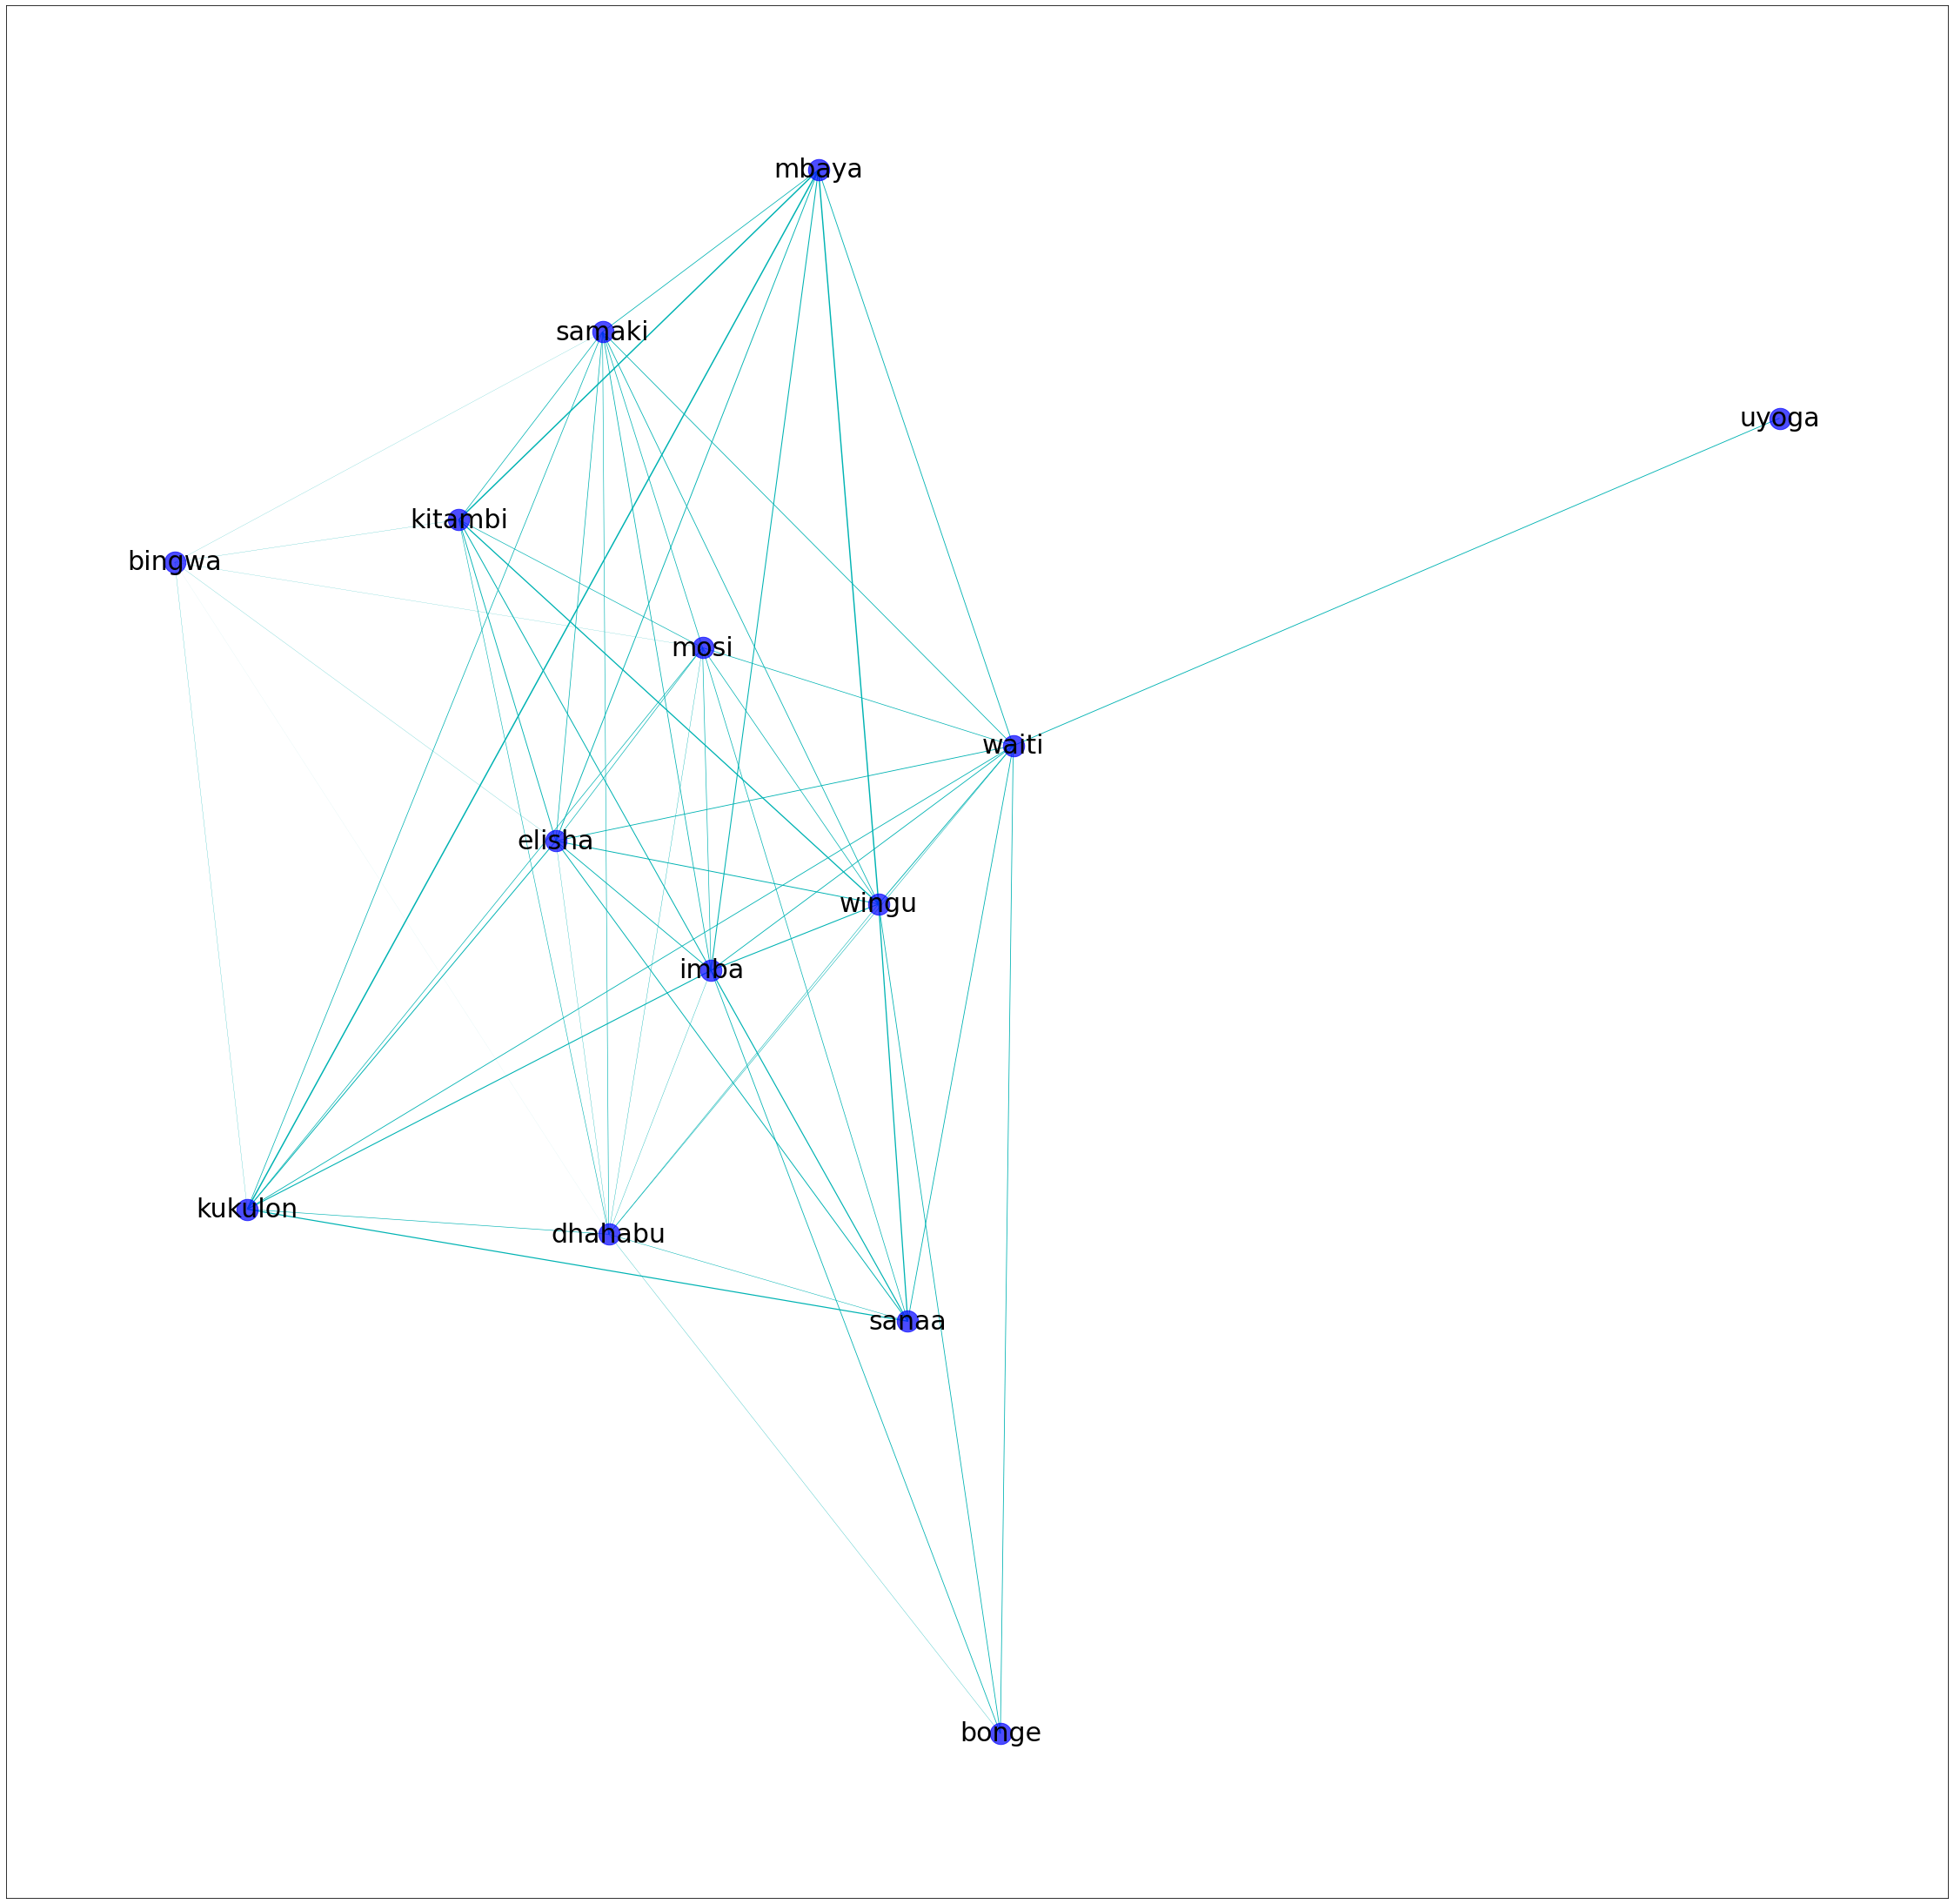

In [ ]:
edge_data_wet_season_mm = [(row["A"], row["B"], {"weight": row["DAI"]}) for row in dai_wet_season_mm]

G_wet_season_mm = nx.Graph()
G_wet_season_mm.add_edges_from(edge_data_wet_season_mm)
pos_wet_season_mm = nx.spring_layout(G_wet_season_mm)

widths_wet_season_mm = nx.get_edge_attributes(G_wet_season_mm, 'weight')
weights_wet_season_mm = list(widths_wet_season_mm.values())

edge_colors_wet_season_mm = generate_edge_colors(weights_wet_season_mm)

weight_adjusted_wet_season_mm = list(map(lambda x: x * 3, weights_wet_season_mm))

fig, ax = plt.subplots(figsize=(40, 40))


nx.draw_networkx_nodes(G_wet_season_mm, pos_wet_season_mm, ax=ax,
                       nodelist=G_wet_season_mm.nodes(),
                       node_color='blue',
                       node_size=600,
                       alpha=0.7)

nx.draw_networkx_edges(G_wet_season_mm, pos_wet_season_mm,
                       edgelist = widths_wet_season_mm.keys(),
                       width=weight_adjusted_wet_season_mm,
                       edge_color=edge_colors_wet_season_mm,
                       alpha=1)
nx.draw_networkx_labels(G_wet_season_mm, pos=pos_wet_season_mm,
                        labels=dict(zip(G_wet_season_mm.nodes(),G_wet_season_mm.nodes())),
                        font_size=30,
                        font_color='black')

{'alizeti': Text(-0.9999999999999999, 0.12778561641141242, 'alizeti'),
 'jua': Text(0.008317434549031163, -0.11186281216209584, 'jua'),
 'baseka': Text(0.23061038787674373, -0.2950450049539384, 'baseka'),
 'joto': Text(0.037008741827731804, -0.26652442379388863, 'joto'),
 'kasolya': Text(0.08830182199581497, 0.06339405994176991, 'kasolya'),
 'kinanda': Text(-0.106695200323807, -0.046151149621321975, 'kinanda'),
 'maua': Text(0.10522497772640492, -0.06907559397001922, 'maua'),
 'zai': Text(0.22810937386416483, -0.02413290352514537, 'zai'),
 'corona': Text(-0.03286382698315312, 0.22398706888982853, 'corona'),
 'kovujicho': Text(0.14955727358262558, 0.22427229191690654, 'kovujicho'),
 'mbawa': Text(-0.04215132723737246, -0.18819963329317643, 'mbawa'),
 'rosa': Text(0.3345803431218154, 0.3615524841596679, 'rosa')}

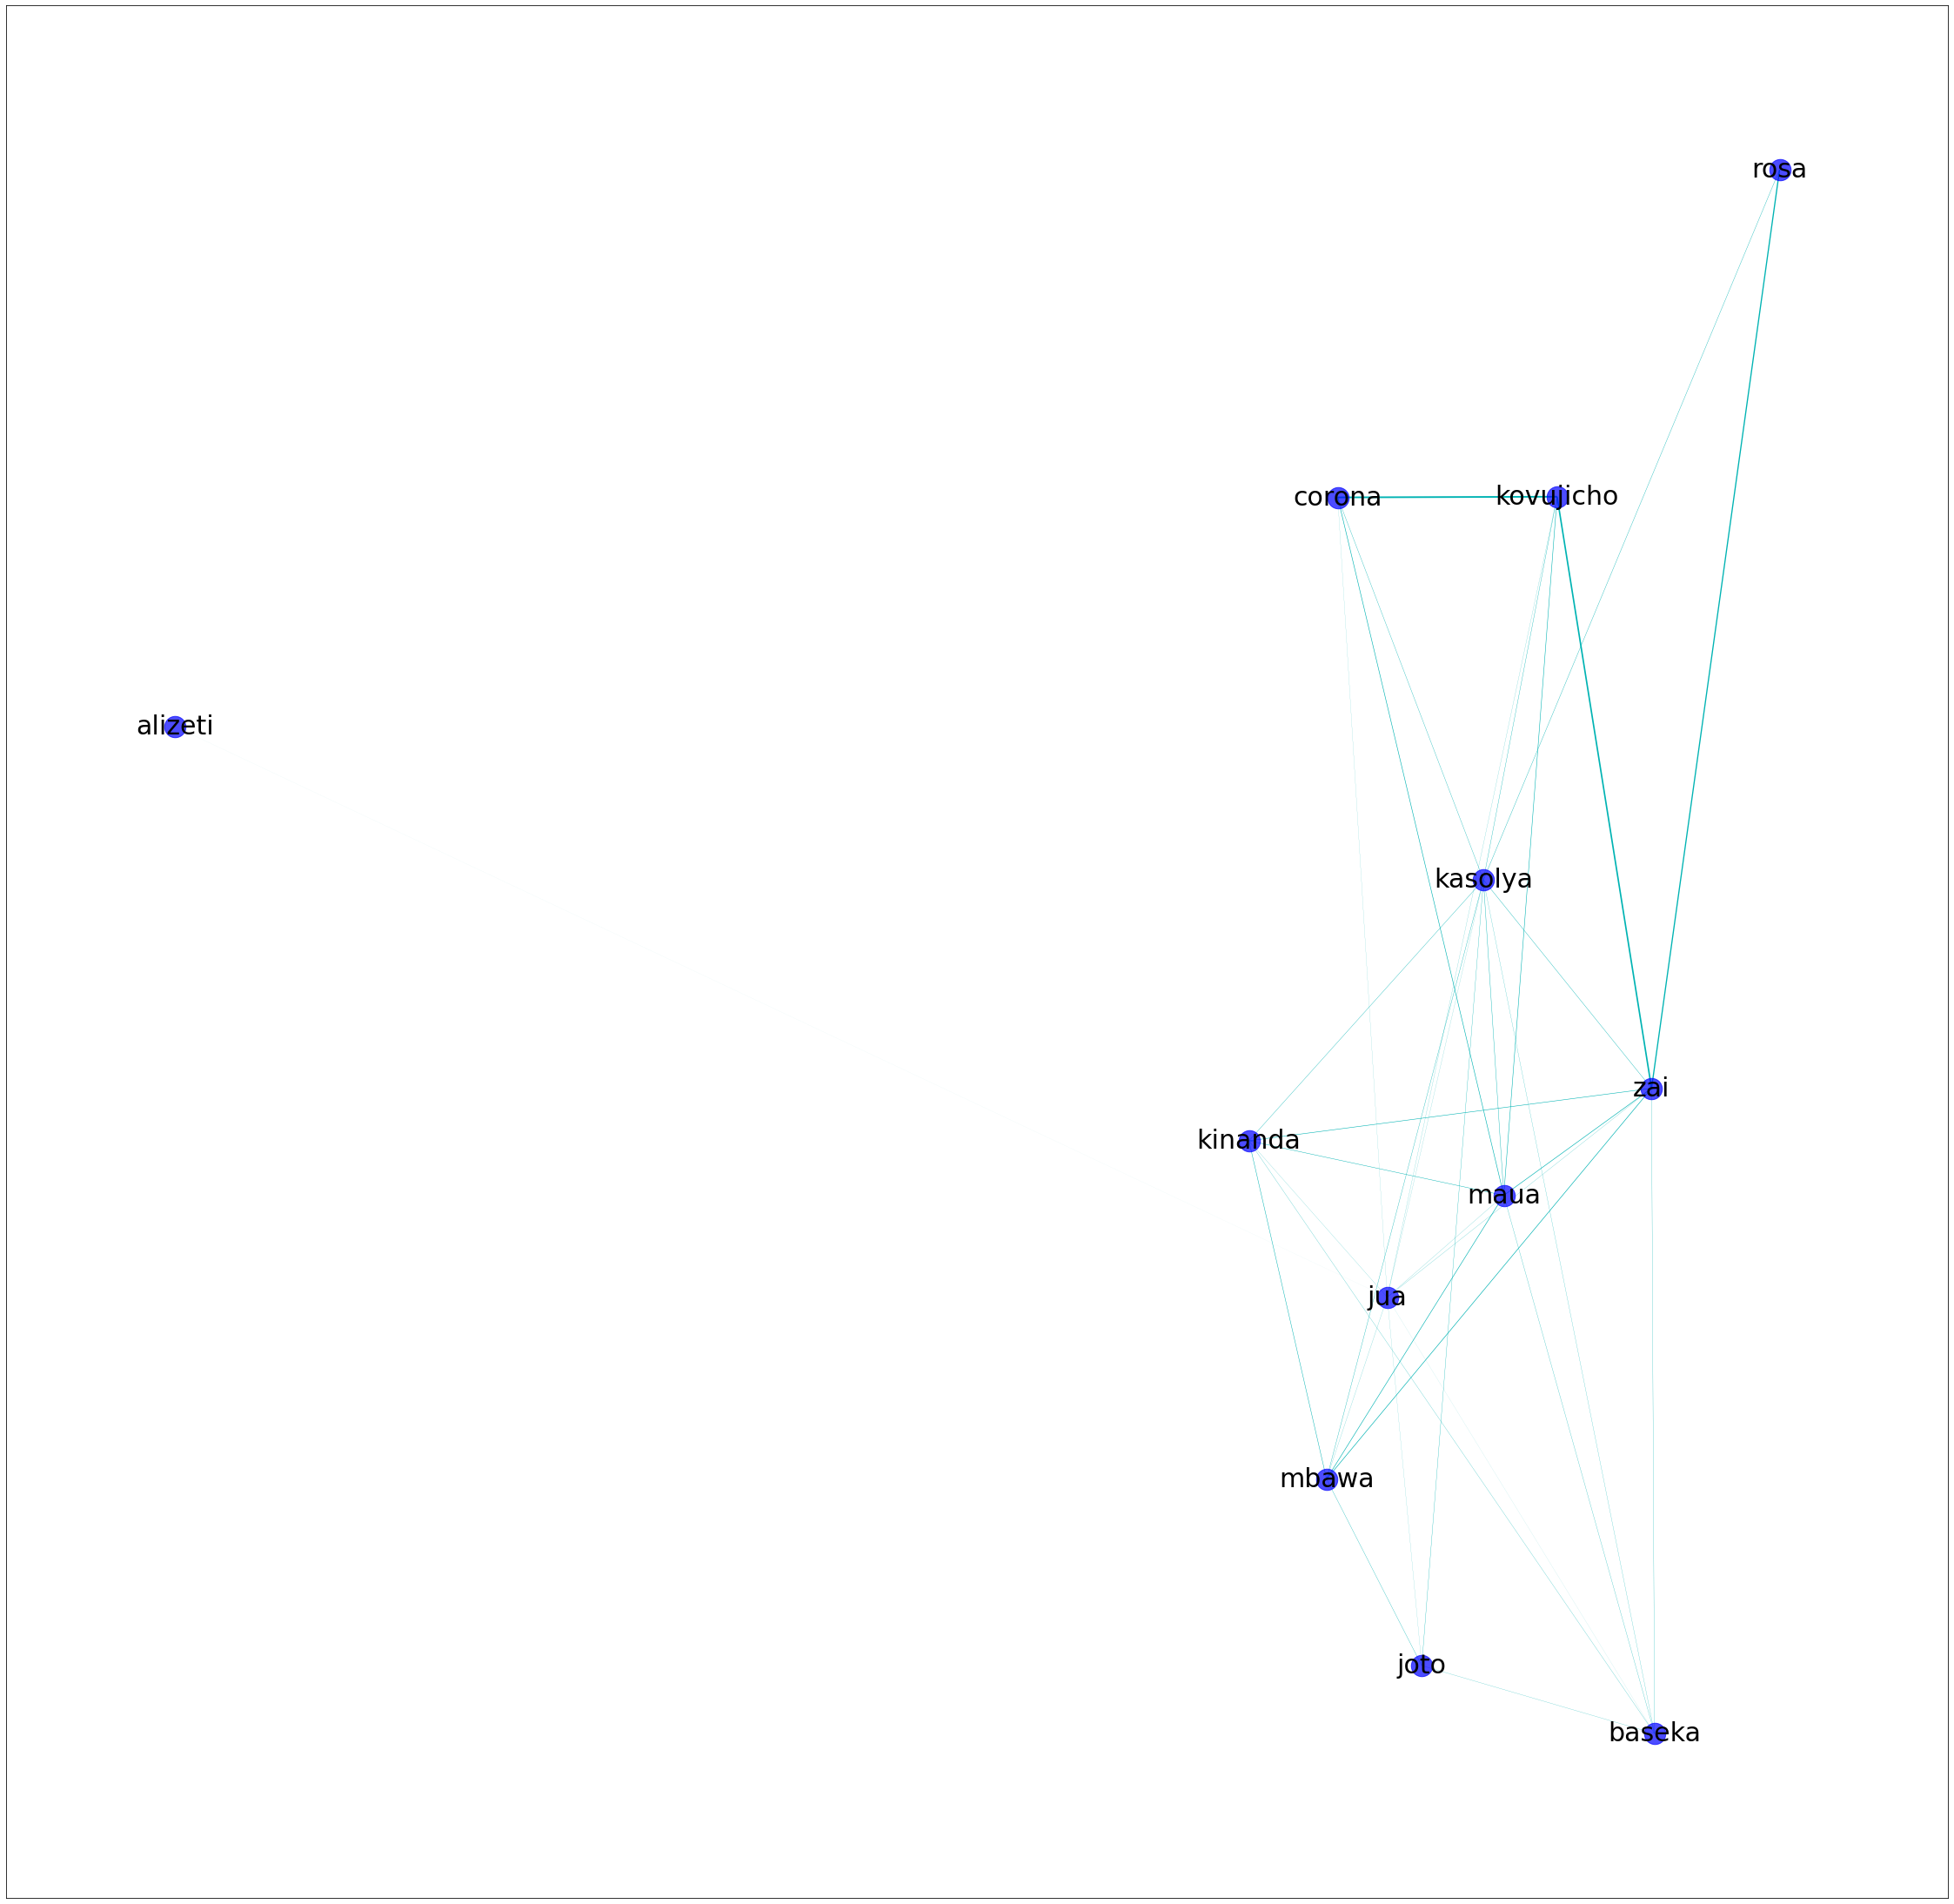

In [ ]:
edge_data_dry_season_ff = [(row["A"], row["B"], {"weight": row["DAI"]}) for row in dai_dry_season_ff]

G_dry_season_ff = nx.Graph()
G_dry_season_ff.add_edges_from(edge_data_dry_season_ff)
pos_dry_season_ff = nx.spring_layout(G_dry_season_ff)

fig, ax = plt.subplots(figsize=(40, 40))

widths_dry_season_ff = nx.get_edge_attributes(G_dry_season_ff, 'weight')
weights_dry_season_ff = list(widths_dry_season_ff.values())

edge_colors_dry_season_ff = generate_edge_colors(weights_dry_season_ff)

weight_adjusted_dry_season_ff = list(map(lambda x: x * 3, weights_dry_season_ff))

nx.draw_networkx_nodes(G_dry_season_ff, pos_dry_season_ff, ax=ax,
                       nodelist=G_dry_season_ff.nodes(),
                       node_color='blue',
                       node_size=600,
                       alpha=0.7)

nx.draw_networkx_edges(G_dry_season_ff, pos_dry_season_ff,
                       edgelist = widths_dry_season_ff.keys(),
                       width=weight_adjusted_dry_season_ff,
                       edge_color=edge_colors_dry_season_ff,
                       alpha=1)
nx.draw_networkx_labels(G_dry_season_ff, pos=pos_dry_season_ff,
                        labels=dict(zip(G_dry_season_ff.nodes(), G_dry_season_ff.nodes())),
                        font_size=30,
                        font_color='black')

{'bingwa': Text(0.4843328151709229, 0.10931026059368006, 'bingwa'),
 'elisha': Text(0.28435577153394126, -0.24953299407511975, 'elisha'),
 'kitambi': Text(0.3335839815516493, 0.25883103711140387, 'kitambi'),
 'waiti': Text(-0.21094022796180087, 0.04071684886665259, 'waiti'),
 'bonge': Text(0.1428072957091839, 0.22059062024738704, 'bonge'),
 'dhahabu': Text(-0.08104063917563037, -0.34159801664204703, 'dhahabu'),
 'imba': Text(0.2019891427634463, -0.04415009626605457, 'imba'),
 'mbaya': Text(0.03230426112106176, 0.016369038940717097, 'mbaya'),
 'mosi': Text(0.4795202179645387, -0.08372781720321533, 'mosi'),
 'samaki': Text(-0.16783235609546882, -0.12743253412259142, 'samaki'),
 'sanaa': Text(-0.023059839077110594, 0.211833959883488, 'sanaa'),
 'uyoga': Text(-0.11204681229280433, 0.8400129957637268, 'uyoga'),
 'wingu': Text(0.08884431930673632, -0.2550461605998139, 'wingu'),
 'kinundi': Text(-0.9306577109285178, -1.0, 'kinundi'),
 'kukulon': Text(-0.5221602195901475, 0.4038228575017881, '

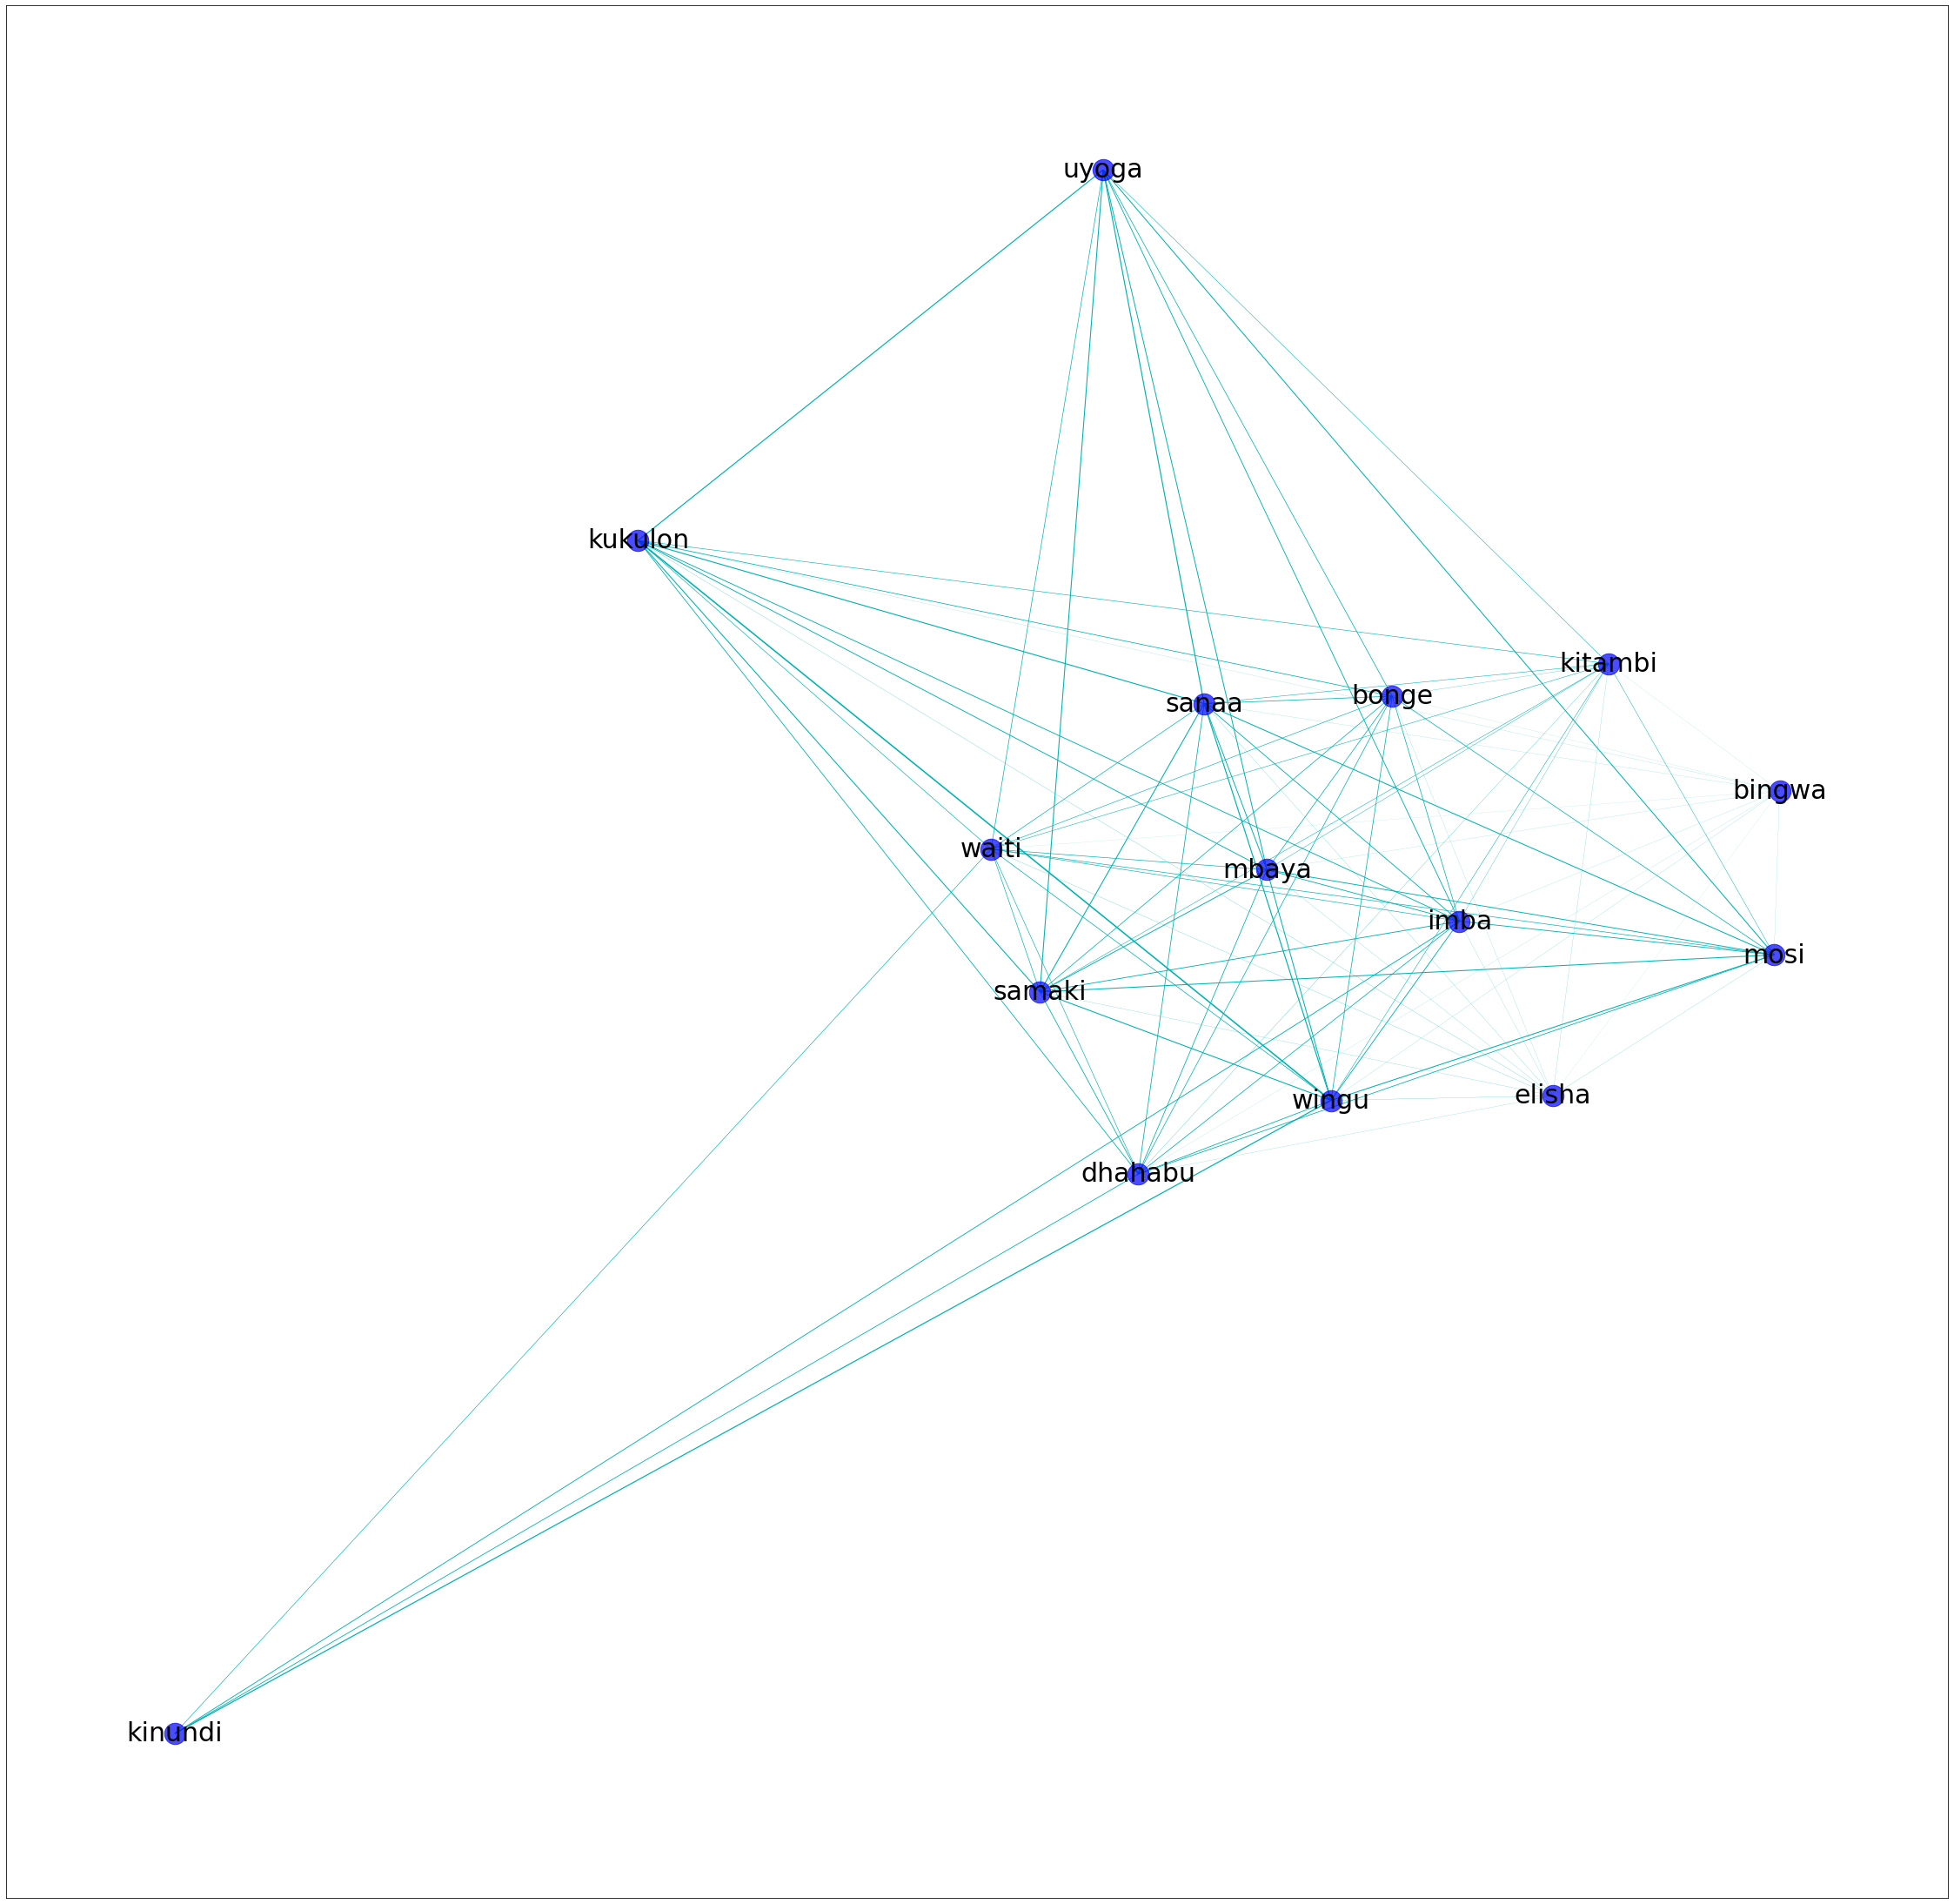

In [ ]:
edge_data_dry_season_mm = [(row["A"], row["B"], {"weight": row["DAI"]}) for row in dai_dry_season_mm]

G_dry_season_mm = nx.Graph()
G_dry_season_mm.add_edges_from(edge_data_dry_season_mm)
pos_dry_season_mm = nx.spring_layout(G_dry_season_mm)

fig, ax = plt.subplots(figsize=(40, 40))

widths_dry_season_mm = nx.get_edge_attributes(G_dry_season_mm, 'weight')
weights_dry_season_mm = list(widths_dry_season_mm.values())

edge_colors_dry_season_mm = generate_edge_colors(weights_dry_season_mm)

weight_adjusted_dry_season_mm = list(map(lambda x: x * 3, weights_dry_season_mm))

nx.draw_networkx_nodes(G_dry_season_mm, pos_dry_season_mm, ax=ax,
                       nodelist=G_dry_season_mm.nodes(),
                       node_color='blue',
                       node_size=600,
                       alpha=0.7)

nx.draw_networkx_edges(G_dry_season_mm, pos_dry_season_mm,
                       edgelist = widths_dry_season_mm.keys(),
                       width=weight_adjusted_dry_season_mm,
                       edge_color=edge_colors_dry_season_mm,
                       alpha=1)
nx.draw_networkx_labels(G_dry_season_mm, pos=pos_dry_season_mm,
                        labels=dict(zip(G_dry_season_mm.nodes(), G_dry_season_mm.nodes())),
                        font_size=30,
                        font_color='black')

In [ ]:
nx.average_clustering(G_wet_season_ff)

0.1

In [ ]:
nx.average_clustering(G_wet_season_mm)

0.7495413316841889

In [ ]:
nx.average_clustering(G_dry_season_ff)

0.7223544973544973

In [ ]:
nx.average_clustering(G_dry_season_mm)

0.918014948014948